## Segmenting Revenue by Customer' and Products
This is the first view of segmenting the store revenue by customers and products. This will be subsequently refined. We start with the customer data and products data. Similar to word frequencies in text data, this data exhibits long tail behavior. Some customers are very loyal, while most customers visit the store only once. A small number of products account for most of the purchases. Formally, this behaviour can be captured by a Zipf distribution. We will fit a Zipf distribution to this data and confirm that this is indeed a good choice with a goodness of fit test. The tail of these data is very, very long. To make the illustration, we will limit attention to customer's who make at least a threshold number of visits to the store. Similarly with the products data, we will limit attention to products purchased at least a threshold number of times.

In [1]:
import pandas as pd
fp_co = "../data/olist_prepared/olist_2_year_customer_orders.csv"
df_co = pd.read_csv(fp_co)


# Note
The probablity mass function of the Zip'f distribution with parameters $k,a$ is given by:

$f(k,a) = \frac{1}{\zeta(a) k^{a}}$

where:
* $a$ is the shape parameter

* $\zeta(a)$ is the Riemann Zeta function

In [2]:
THRESHOLD_COUNT_VALUE = 5
filter_long_tail = df_co.order_count >= THRESHOLD_COUNT_VALUE
df_co = df_co[filter_long_tail]

In [3]:
df_co

,index,customer_id,order_count,rank
0,97220,fc3d1daec319d62d49bfb5e1f83123e9,21,1
1,73568,be1b70680b9f9694d8c70f41fa3dc92b,20,2
2,73311,bd5d39761aa56689a265d95d8d32b8be,20,3
3,67106,adb32467ecc74b53576d9d13a5a55891,15,4
4,6456,10de381f8a8d23fff822753305f71cae,15,5
...,...,...,...,...
455,23538,3cece65c04345bbf576cca0ee4059189,5,456
456,28128,490c0ea9e613c1769e6a9fc3034753e3,5,457
457,37031,6058d310d497d1af90c0f2058955efdc,5,458
458,92476,ef71c5535a28abdda262e72781f9fa3c,5,459


In [4]:
f"The number of customers who have ordered {THRESHOLD_COUNT_VALUE} or more time is {df_co.shape[0]}"

'The number of customers who have ordered 5 or more time is 460'

In [5]:
import numpy as np
from scipy.stats import zipf
import matplotlib.pyplot as plt

In [6]:
y = df_co["rank"].astype(float)
x = df_co["order_count"].astype(float)

In [7]:
# Estimate the parameter 'a' using maximum likelihood estimation
def neg_log_likelihood(a, x, y):
    return -np.sum(y * np.log(zipf.pmf(x, a)))

from scipy.optimize import minimize
initial_guess = 2.0  # Initial guess for 'a'
result = minimize(neg_log_likelihood, initial_guess, args=(x, y), method='Nelder-Mead')
best_a = result.x[0]

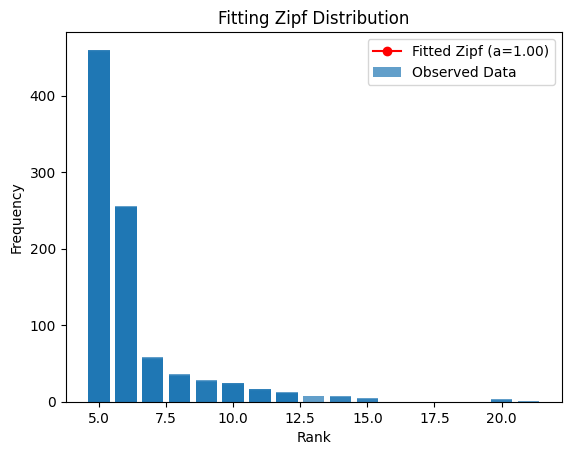

In [8]:
# Generate the fitted Zipf distribution
fitted_zipf = zipf.pmf(x, best_a) * sum(y)

# Plot the original data and the fitted Zipf distribution
plt.bar(x, y, label='Observed Data', alpha=0.7)
plt.plot(x, fitted_zipf, label=f'Fitted Zipf (a={best_a:.2f})', color='red', marker='o')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Fitting Zipf Distribution')
plt.legend()
plt.show()


In [9]:
import numpy as np
from scipy.stats import chisquare
from scipy.special import zeta

def zipf_expected_frequencies(n, s):
    ranks = np.arange(1, n + 1)
    expected_probs = (1.0 / (ranks**s)) / zeta(s)
    return expected_probs

def goodness_of_fit_zipf(x,s):
    # Example Data (Observed Frequencies)
    observed_freqs = x
    
    # Estimate the Zipf parameter 's' (e.g., using maximum likelihood estimation)
    # This is a simplified example, you might need more sophisticated methods
    s = best_a
    
    # Number of categories
    n = len(observed_freqs)

    # Calculate Expected Frequencies
    expected_probs = zipf_expected_frequencies(n, s)
    total_observations = sum(observed_freqs)
    expected_freqs = expected_probs * total_observations

    # Perform Chi-Square Test
    chi2_statistic, p_value = chisquare(observed_freqs, f_exp=expected_freqs)
    print(f"Chi-square statistic: {chi2_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")
    return chi2_statistic, p_value



In [10]:
# Interpretation
alpha = 0.05
c2s, pv = goodness_of_fit_zipf(x, best_a)


if pv < alpha:
    print("Reject the null hypothesis: Data does not follow Zipf distribution.")
else:
    print("Fail to reject the null hypothesis: Data might follow Zipf distribution.")

Chi-square statistic: -1246827005396116480.00
P-value: 1.000
Fail to reject the null hypothesis: Data might follow Zipf distribution.


In [11]:
fp_pp = "../data/olist_prepared/olist_2_year_prod_purchases.csv"
df_pp = pd.read_csv(fp_pp)
THRESHOLD_COUNT_VALUE = 5
filter_long_tail = df_pp["count"] >= THRESHOLD_COUNT_VALUE
df_pp = df_pp[filter_long_tail]

In [12]:
f"The number of products purchased {THRESHOLD_COUNT_VALUE} or more time is {df_pp.shape[0]}"

'The number of products purchased 5 or more time is 4832'

In [13]:
y = df_pp["rank"].astype(float)
x = df_pp["count"].astype(float)

In [14]:
initial_guess = 2.0  # Initial guess for 'a'
result = minimize(neg_log_likelihood, initial_guess, args=(x, y), method='Nelder-Mead')
best_a = result.x[0]

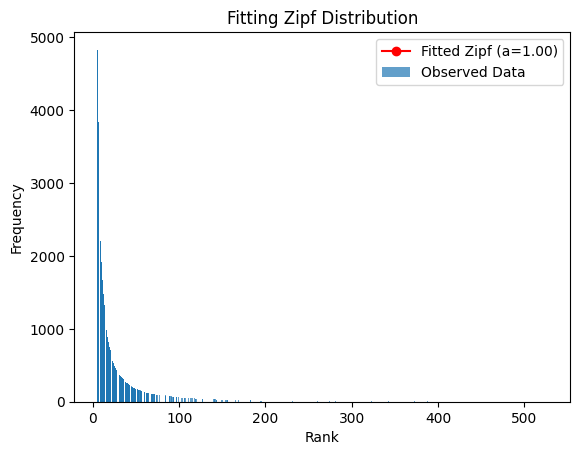

In [15]:
# Generate the fitted Zipf distribution
fitted_zipf = zipf.pmf(x, best_a) * sum(y)

# Plot the original data and the fitted Zipf distribution
plt.bar(x, y, label='Observed Data', alpha=0.7)
plt.plot(x, fitted_zipf, label=f'Fitted Zipf (a={best_a:.2f})', color='red', marker='o')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Fitting Zipf Distribution')
plt.legend()
plt.show()


In [16]:
# Interpretation
alpha = 0.05
c2s, pv = goodness_of_fit_zipf(x, best_a)


if pv < alpha:
    print("Reject the null hypothesis: Data does not follow Zipf distribution.")
else:
    print("Fail to reject the null hypothesis: Data might follow Zipf distribution.")

Chi-square statistic: -14812361689147248640.00
P-value: 1.000
Fail to reject the null hypothesis: Data might follow Zipf distribution.


## Compute Summary Statistics Needed for Calculations

In [17]:
NUM_FREQ_CUSTOMERS = df_co.shape[0]

In [18]:
fp_daily_raw = "../data/olist_prepared/olist_daily_orders_prepared.csv"
df_daily_raw = pd.read_csv(fp_daily_raw)

In [19]:
TOTAL_STORE_REVENUE_FOR_2_YEARS  = df_daily_raw["price"].sum()

In [20]:
df_daily_raw["order_purchase_timestamp"] = pd.to_datetime(df_daily_raw["order_purchase_timestamp"])

In [21]:
PERIOD_START_DATE = df_daily_raw["order_purchase_timestamp"].dt.date.min()
PERIOD_END_DATE = df_daily_raw["order_purchase_timestamp"].dt.date.max()
PERIOD = (PERIOD_END_DATE - PERIOD_START_DATE).days

In [22]:
NUM_CUSTOMERS_TOTAL = df_daily_raw["customer_id"].unique().shape[0]
NUM_PRODUCTS_TOTAL = df_daily_raw["product_id"].unique().shape[0]

In [23]:
freq_cust_list = df_co["customer_id"].tolist()
df_daily_raw["freq_cust"] = df_daily_raw["customer_id"].isin(freq_cust_list)

In [24]:
df_daily_non_freq_cust = df_daily_raw[~df_daily_raw.freq_cust]


In [25]:
REVENUE_FROM_NON_FREQUENT_CUSTOMERS = df_daily_non_freq_cust["price"].sum()
REVENUE_FROM_FREQUENT_CUSTOMERS = df_daily_raw[df_daily_raw.freq_cust].price.sum()
PCT_REVENUE_FROM_FREQ_CUSTOMERS = (REVENUE_FROM_FREQUENT_CUSTOMERS/TOTAL_STORE_REVENUE_FOR_2_YEARS)*100
PCT_REVENUE_FROM_NON_FREQ_CUSTOMERS = 100 - PCT_REVENUE_FROM_FREQ_CUSTOMERS

In [26]:
PCT_REVENUE_FROM_NON_FREQ_CUSTOMERS

np.float64(98.41535236830848)

In [27]:
NUM_PRODUCTS_TOTAL = df_daily_raw["product_id"].unique().shape[0]
NUM_FREQ_PURCHASED_PRODUCTS = df_pp["product_id"].unique().shape[0]

In [28]:
freq_purch_products = df_pp["product_id"].tolist()

In [29]:
df_daily_raw["freq_purch_prod"] = df_daily_raw["product_id"].isin(freq_purch_products)

In [30]:
REVENUE_FROM_NON_FREQUENT_PRODUCTS = df_daily_raw[~df_daily_raw["freq_purch_prod"]]["price"].sum()
REVENUE_FROM_FREQUENT_PRODUCTS = df_daily_raw[df_daily_raw["freq_purch_prod"]]["price"].sum()
PCT_REVENUE_FROM_FREQ_PURCH_PRODS = (REVENUE_FROM_FREQUENT_PRODUCTS/TOTAL_STORE_REVENUE_FOR_2_YEARS)*100
PCT_REVENUE_FROM_NON_FREQ_PURCH_PRODS = 100 - PCT_REVENUE_FROM_FREQ_PURCH_PRODS

In [31]:
PCT_REVENUE_FROM_FREQ_PURCH_PRODS

np.float64(53.88181121905071)

In [44]:
dict_results = { "Percentage of revenue from frequent customers": PCT_REVENUE_FROM_NON_FREQ_CUSTOMERS,\
"Percentage of revenue from non-frequent customers": PCT_REVENUE_FROM_NON_FREQ_CUSTOMERS,\
"Percentage of revenue from frequently purchased products": PCT_REVENUE_FROM_FREQ_PURCH_PRODS,\
"Percentage of revenue from non-frequenly purchased products": PCT_REVENUE_FROM_NON_FREQ_PURCH_PRODS}

df_results = pd.DataFrame.from_dict(dict_results, orient="index").round(3).reset_index()
df_results.columns = ["Performance Metric", "Percentage"]

In [45]:
df_results

,Performance Metric,Percentage
0,Percentage of revenue from frequent customers,98.415
1,Percentage of revenue from non-frequent customers,98.415
2,Percentage of revenue from frequently purchase...,53.882
3,Percentage of revenue from non-frequenly purch...,46.118


## NOTE:
Key observation is that frequently purchased products are much more of a revenue driver than frequent customers. Managing inventory to prevent stockouts of freq